# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Dzaky Khairy
- **Email:** dzakykhairych@gmail.com
- **ID Dicoding:** m_dzaky_khairy

## Menentukan Pertanyaan Bisnis

- Di jam berapa dalam sehari terjadi peningkatan yang signifikan dalam penggunaan *Bike Sharing*?
- Bagaimana pengaruh cuaca terhadap tingkat penggunaan *Bike Sharing*?
- Pada musim apa terjadi peningkatan tren *Bike Sharing*?
- Bagaimana perbandingan rata-rata jumlah pengguna *registered* dan *casual* dalam penggunaan *Bike Sharing* setiap bulannya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# ignore FutureWarnings and UserWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


## Data Wrangling

### Gathering Data

#### Downloading Data for Colab (Bagian ini tidak perlu di run jika menggunakan Jupyter)

In [ ]:
!gdown --id \
  1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ \
  -O /content/data.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/data.zip
100% 280k/280k [00:00<00:00, 102MB/s]


In [ ]:
import zipfile,os
from google.colab import files

local_zip = '/content/data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data')
zip_ref.close()

Kode di atas digunakan untuk mendownload dataset dari drive dan menyimpan semua dataset pada folder /content/data

#### Melihat Data day

In [ ]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Melihat Data hour

In [ ]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat dilihat bahwa format pada column `dteday` belum bertipe datetime yang mana berjumlah 731 day.

In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pada dataset `day` tidak ditemukan *Missing Value*.

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Bedasarkan kode di atas dapat diketahui bahawa tidak ditemukan duplikat pada data `day` dan berdasarkan nilai `mean` dan `median` tidak terlihat adanya keanehan pada data.

#### Menilai Data hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat dilihat bahwa pada dataset hour terdapat total 17.379 data yang direkam tiap jam dan dapat dilihat juga bahwa `dteday` belum bertipe datetime.

In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pada dataset hour tidak ditemukan *missing value*.

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari code di atas dapat diketahui bahwa tidak ada duplikasi pada data hour, dapat dilihat juga season memiliki nilai dari 1 hingga 4, sedangkan hr memiliki nilai dari 0 hingga 23.

### Cleaning Data

Mengubah format `dteday` menjadi datetime

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [ ]:
day_df['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [ ]:
hour_df['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


Dapat dilihat bahwa tipe data dari `dteday` telah berumah menjadi `datetime64`.

## Exploratory Data Analysis (EDA)

### Explorasi data day_df dan hour_df

Kedua data memiliki kolom yang sama, namun yang membedakan hanyalah pada dataset `day` di ukur dalam hari dan pada dataset `hour` di ukur dalam jam.

In [ ]:
# day_df.describe(include="all")

Data yang digunakan masih dalam bentuk representasi numerik dari nilai kategorikal, sehingga perlu di ubah menjadi nilai kategorikal

In [ ]:
seasons_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

weather_labels = {
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan Ringan',
    4: 'Hujan Lebat'
}

In [ ]:
day_df['season'] = day_df['season'].map(seasons_labels)
day_df['weathersit'] = day_df['weathersit'].map(weather_labels)
hour_df['season'] = hour_df['season'].map(seasons_labels)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_labels)

In [ ]:
day_df.groupby(by=["weathersit"]).agg({
    "cnt": "mean"
})

,cnt
weathersit,
Berawan,4035.862348
Cerah,4876.786177
Hujan Ringan,1803.285714


pivot table di atas dapat memberikan kita gambaran terkait rata-rata jumlah penggunan *Bike Sharing* pada satu hari berdasarkan cuaca, yang mana *Bike sharing* paling sering digunakan pada cuaca **Cerah**.

In [ ]:
day_df.groupby(by=["season"]).agg({
    "cnt": "mean"
})

,cnt
season,
Fall,5644.303191
Spring,2604.132597
Summer,4992.331522
Winter,4728.162921


Berdasarkan pivot table tersebut, diketahui bahwa tren penggunaan *Bike Sharing* paling tinggi terjadi pada musim gugur (**Fall**). Selain itu kita juga dapat mengetahui bahwa pada musim semi (**Spring**) terjadi penurunan tren penggunaan *Bike Sharing*.

In [ ]:
day_df.groupby(by=["mnth"]).agg({
    "casual": "mean",
    "registered": "mean"
})

,casual,registered
mnth,,
1,194.225806,1982.112903
2,262.508772,2392.789474
3,716.838710,2975.419355
4,1013.366667,3471.533333
5,1214.274194,4135.500000
6,1231.766667,4540.600000
7,1260.596774,4303.080645
8,1161.919355,4502.500000
9,1172.050000,4594.466667


Pivot table di atas memberikan kita gambaran terkait perbandingan jumlah pengguna `casual` dan `registered` tiap bulannya.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Di jam berapa dalam sehari terjadi peningkatan yang signifikan dalam penggunaan Bike Sharing?

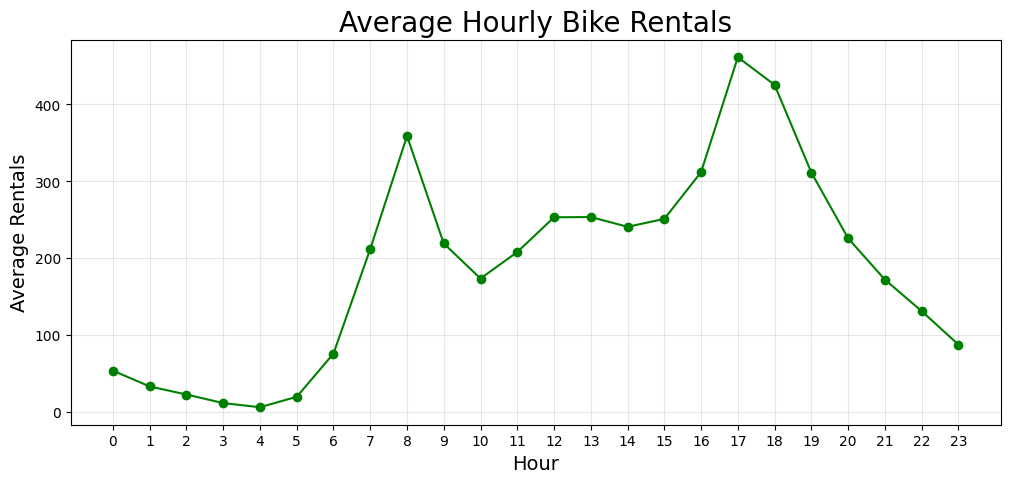

In [ ]:
average_rent_hr = hour_df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(12, 5))
plt.xticks(average_rent_hr.index, labels=average_rent_hr.index)
plt.plot(average_rent_hr.index, average_rent_hr.values, marker='o', color='g')
plt.xlabel('Hour', size=14)
plt.ylabel('Average Rentals', size=14)
plt.title('Average Hourly Bike Rentals', size=20)
plt.grid(True, alpha=0.3)
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat bahwa peningkatan yang signifikan dalam penggunaan *Bike Sharing* terjadi pada **peak hours** yakni, pada jam **8** pagi dan **5** sore. Selain itu dapat diketahui juga pada jam 4 pagi merupakan waktu penggunaan *Bike Sharing* paling sedikit.

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap tingkat penggunaan Bike Sharing?

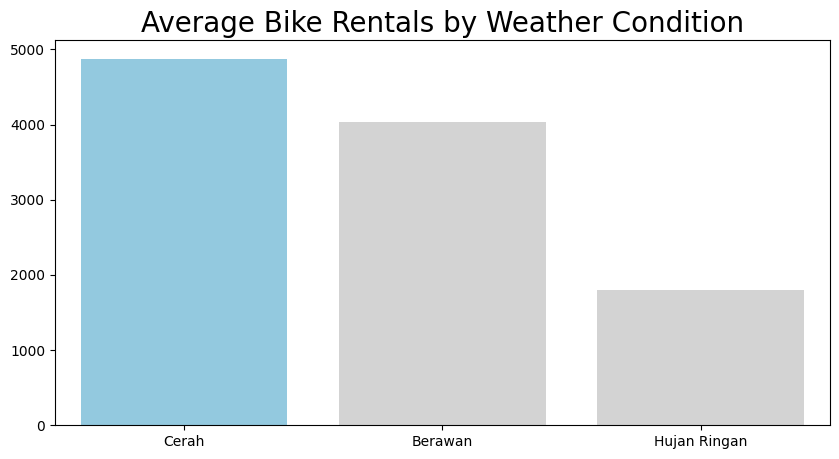

In [ ]:
average_rent_by_weather = day_df.groupby('weathersit')['cnt'].mean().reset_index().sort_values("cnt")

plt.figure(figsize=(10, 5))
# plt.bar(x=average_rent_by_weather['weathersit'], height=average_rent_by_weather['cnt'], color='skyblue')
colors_ = ["#87CEEB", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="weathersit",
    y="cnt",
    data=average_rent_by_weather.sort_values(by="cnt", ascending=False),
    palette=colors_
)
plt.title('Average Bike Rentals by Weather Condition', size=20)
plt.ylabel(None)
plt.xlabel(None)
plt.show()

Berdasarkan visualisasi data tersebut, dapat diketahui bahwa penggunaan *Bike Sharing* lebih sering dilakukan pada saat cuaca **Cerah**.

### Pertanyaan 3: Pada musim apa terjadi peningkatan tren Bike Sharing?

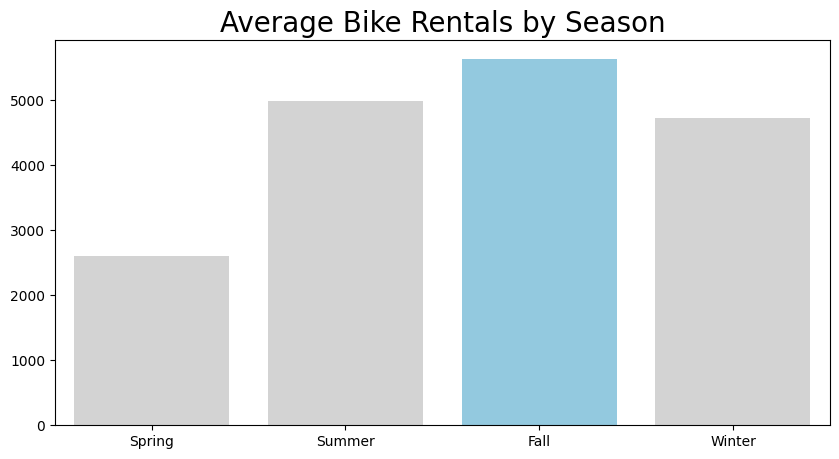

In [ ]:
averages_rent_by_season = day_df.groupby('season')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 5))
# plt.bar(x=average_rent_by_weather['weathersit'], height=average_rent_by_weather['cnt'], color='skyblue')
colors_ = ["#D3D3D3", "#D3D3D3", "#87CEEB", "#D3D3D3"]
sns.barplot(
    x="season",
    y="cnt",
    data=averages_rent_by_season,
    palette=colors_,
    order=['Spring', 'Summer', 'Fall', 'Winter']
)
plt.title('Average Bike Rentals by Season', size=20)
plt.ylabel(None)
plt.xlabel(None)
plt.show()

Berdasarkan visualisasi data tersebut, dapat diketahui bahwa tren penggunaan *Bike Sharing* paling tinggi terjadi pada musim gugur (**Fall**).

### Pertanyaan 4: Bagaimana perbandingan rata-rata jumlah pengguna registered dan casual dalam penggunaan Bike Sharing setiap bulannya?

In [ ]:
monthly_avg_rentals = day_df.groupby('mnth')["casual", "registered"].mean().reset_index()

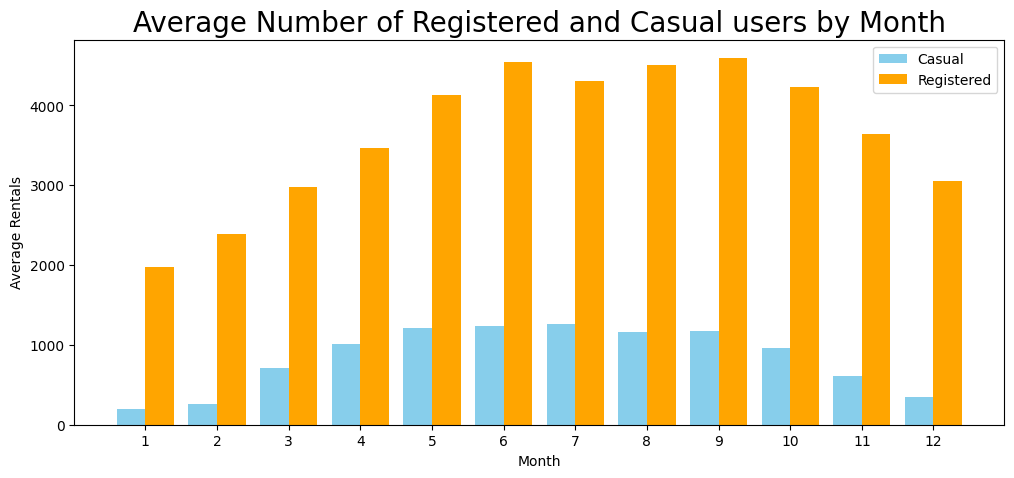

In [ ]:
bar_width = 0.4

plt.figure(figsize=(12, 5))
index = range(len(monthly_avg_rentals["mnth"]))

plt.bar(index, monthly_avg_rentals["casual"], bar_width, label='Casual', color='skyblue')
plt.bar([i + bar_width for i in index], monthly_avg_rentals["registered"], bar_width, label='Registered', color='orange')

plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.title('Average Number of Registered and Casual users by Month', size=20)
plt.xticks([i + bar_width / 2 for i in index], monthly_avg_rentals["mnth"])
plt.legend()
plt.show()

Berdasarkan gambar di atas, terlihat bahwa sekitar **18**% dari total pengguna pada setiap bulannya merupakan pengguna *Casual*.

In [ ]:
# total_average = monthly_avg_rentals["registered"].mean() + monthly_avg_rentals["casual"].mean()

# registered_percentage = (monthly_avg_rentals["registered"].mean() / total_average) * 100
# casual_percentage = (monthly_avg_rentals["casual"].mean() / total_average) * 100

# labels = ['Registered', 'Casual']
# sizes = [registered_percentage, casual_percentage]
# colors = ['skyblue', 'orange']

# plt.figure(figsize=(8, 8))
# plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
# plt.title(f'Percentage of Registered and Casual Users for Month')
# plt.axis('equal')
# plt.show()

## Conclusion

- Terjadi peningkatan yang signifikan dalam penggunaan *Bike Sharing* pada jam 8 pagi dan 5 sore, hal ini dapat disebabkan karena pada jam tersebut merupakan waktu pergi dan pulang kerja atau sekolah, jam tersebut merupakan waktu yang paling baik untuk melakukan prommosi

- Kondisi cuaca sangat mempengaruhi tingkat pengguanan *Bike Sharinng* yang mana penggunaan *Bike sharinng* tertinggi terjadi pada saat cuaca Cerah. Selain itu, saat hujan lebat, tidak ada penggunaan Bike Sharing yang terjadi.

- Musim gugur (*Fall*) merupakan musim dengan tren penggunaan *Bike Sharing* tertinggi, hal ini mungkin disebabkan pengaruh kodisi cuaca pada musim tersebut yang cenderung stabil dan minimnya hujan.

- Sekitar 18% pada setiap bulannya pengguna *Bike Sharinng* merupakan pengguna casual yang tidak terdaftar hal ini dapat menjadi peluang untuk mendorong promosi agar pengguna melakukan pendaftaran.